**Exploratory Data Ananysis and Data Wrangling**

In [1]:
import pandas as pd
import seaborn as sns
from statsmodels.formula.api import ols
import numpy as np
import matplotlib.pyplot as plt

C:\Users\Owner\Anaconda3\lib\site-packages\statsmodels\tools\_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
df = pd.read_csv('bank-full.csv')

In [3]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [4]:
df = df.rename(columns={'y':'subscribed'})

In [5]:
sub_df = df[df['subscribed']=='yes']

In [6]:
sub_df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,subscribed
83,59,admin.,married,secondary,no,2343,yes,no,unknown,5,may,1042,1,-1,0,unknown,yes
86,56,admin.,married,secondary,no,45,no,no,unknown,5,may,1467,1,-1,0,unknown,yes
87,41,technician,married,secondary,no,1270,yes,no,unknown,5,may,1389,1,-1,0,unknown,yes
129,55,services,married,secondary,no,2476,yes,no,unknown,5,may,579,1,-1,0,unknown,yes
168,54,admin.,married,tertiary,no,184,no,no,unknown,5,may,673,2,-1,0,unknown,yes


In [7]:
df.isnull().sum()

age           0
job           0
marital       0
education     0
default       0
balance       0
housing       0
loan          0
contact       0
day           0
month         0
duration      0
campaign      0
pdays         0
previous      0
poutcome      0
subscribed    0
dtype: int64

In [8]:
df.nunique()

age             77
job             12
marital          3
education        4
default          2
balance       7168
housing          2
loan             2
contact          3
day             31
month           12
duration      1573
campaign        48
pdays          559
previous        41
poutcome         4
subscribed       2
dtype: int64

In [9]:
df['subscribed'].value_counts()

no     39922
yes     5289
Name: subscribed, dtype: int64

[Text(0.5, 1.0, 'Balance by Marital Status')]

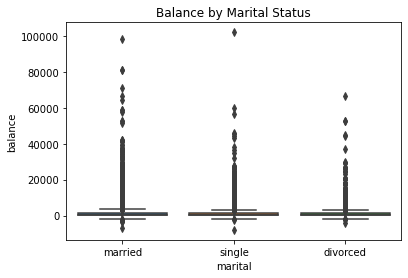

In [10]:
sns.boxplot(x='marital', y='balance', data=df).set(title='Balance by Marital Status')

[Text(0.5, 1.0, 'Balance by Education')]

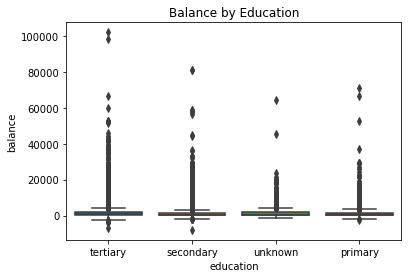

In [11]:
sns.boxplot(x='education', y='balance', data=df).set(title='Balance by Education')

<AxesSubplot:xlabel='job', ylabel='balance'>

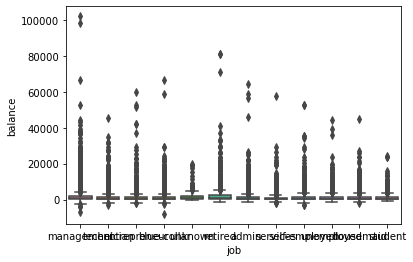

In [12]:
sns.boxplot(x='job', y='balance', data=df)

<AxesSubplot:xlabel='age'>

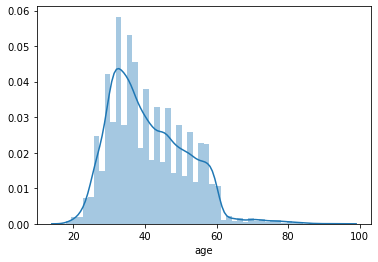

In [13]:
sns.distplot(df['age'])

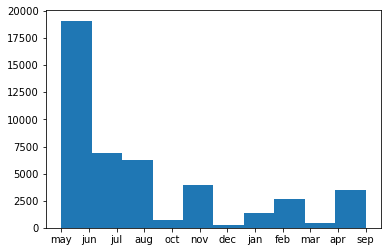

In [14]:
plt.hist(df['month'])
plt.show()